# Workshop 5: Statistics

## Preview: generating random numbers

Notes Lecture 5
 check error bars if chi square d.f. is too small
 check error bars if chi square is to big
 

We will discuss simulations in greater detail later in the semester. The first step in similating nature -- which, despite Einstein's objections, is playing dice after all -- is to learn how to generate some numbers that appear random. Of course, computers cannot generate true random numbers -- they have to follow an algorithm. But the algorithm may be based on something that is difficult to predict (e.g. the time of day you are executing this code) and therefore *look* random to a human. Sequences of such numbers are called *pseudo-random*. 

The random variables you generate will be distributed according to some *Probability Density Function* (PDF). The most common PDF is *flat*: $f(x)=\frac{1}{b-a}$ for $x\in [a..b]$. Here is how to get a random number uniformly distributed between $a=0$ and $b=1$ in Python:

In [16]:
# standard preamble
import numpy as np
import scipy as sp      
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

# generate one random number between [0,1)
x = np.random.rand()
print 'x=',x

# generate an array of 10 random numbers between [0,1)
array = np.random.rand(10)
print array

x= 0.735579594735
[ 0.70370038  0.79145648  0.88082268  0.55825274  0.44241957  0.4846548
  0.69089891  0.17711082  0.59823955  0.28119753]


You can generate a set of randomly-distributed integer values instead:

In [14]:
a = np.random.randint(0,1000,10)  
print a

[741  36   1  68 542 305 124 195 424 835]


# 1d distributions

## Moments of the distribution

Python's SciPy library contains a set of standard statistical functions. See a few examples below:

[ 141.13109523  172.06715623  123.14667746  156.9750233   184.69968581
  112.64365664  194.77820051  117.92100947  112.42340521  172.76265772]
Mean =   151
Median =   149
Standard deviation =  30.2


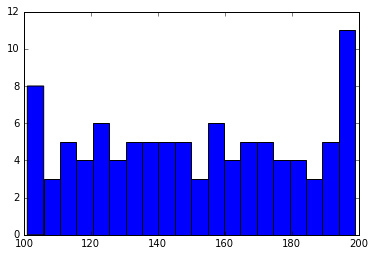

In [29]:
# create a set of data and compute mean and variance
# This creates an array of 100 elements, uniformly-distributed between 100 and 200
a = 100
b = 200
x = np.random.uniform(low=a,high=b,size=100)

print x[0:10]
# make a histogram
n, bins, patches = plt.hist(x, 20)

# various measures of "average value":
print 'Mean = {0:5.0f}'.format(sp.mean(x))
print 'Median = {0:5.0f}'.format(sp.median(x))

# measure of the spread
print 'Standard deviation = {0:5.1f}'.format(np.std(x))


### Exercise 1

1. Generate 100 random numbers, uniformly distributed between [-$\pi,\pi$). 
1. Plot them in a histogram. 
1. Compute mean and standard deviation (RMS)
1. Plot a histogram of sin(x) and cos(x), where x is a uniformly distributed random number between [-pi,pi). Do you understand this distribution ? 

Mean =     0
Standard deviation =   2.0


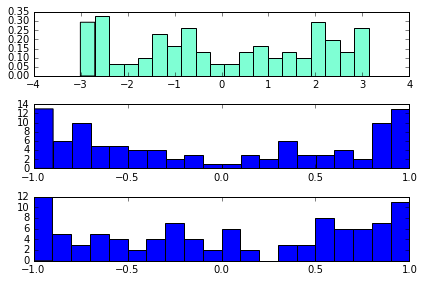

In [29]:
import numpy as np
import scipy as sp      
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

a = -np.pi
b = np.pi
x = np.random.uniform(low=a,high=b,size=100)
plt.subplot(3,1,1)
n, bins, patches = plt.hist(x, 20, normed = True, color = 'aquamarine')

print 'Mean = {0:5.0f}'.format(sp.mean(x))
# measure of the spread
print 'Standard deviation = {0:5.1f}'.format(np.std(x))

plt.subplot(3,1,2)
x1 = np.random.uniform(low=(a),high = (b), size = 100 )
n, bins, patches = plt.hist(np.cos(x1), 20)


plt.subplot(3,1,3)
x2 = np.random.uniform(low=(a),high = (b), size = 100 )
n, bins, patches = plt.hist(np.sin(x2), 20)


plt.tight_layout()
plt.show()

## Gaussian distribution

You can also generate Gaussian-distributed numbers:

In [26]:
# generate a single random number, gaussian-distributed with mean=0 and sigma=1. This is also called 
# a standard normal distribution
x = np.random.standard_normal()
print x

# generate an array of 10 such numbers
a = np.random.standard_normal(size=10)
print a

1.46141226778
[-0.14245864  0.00417954 -0.26508129  0.25203737 -0.89843565  2.11117859
  0.2300637   0.17120155  0.07839833 -1.21901659]


### Exercise 2

1. Generate $N=100$ random numbers, Gaussian-distributed with $\mu=0$ and $\sigma=1$. 
1. Plot them in a histogram. 
1. Compute mean, standard deviation (RMS), and the error on the mean. Is this what you expected?
1. Compute the median of this distribution
1. Compute the of this distribution. *Hint*: you may not be able to use *sp.stats.mode()* function ! (why not ?) To compute the mode properly, you need to use the output of the histogram you produced in part 2.
1. Now find the means, standard deviations, and errors on the means for each of the $M=1000$ experiments of $N=100$ measurements each. Plot a histogram of the means. Is it consistent with your calculation of the error on the mean for $N=100$ ? About how many experiments yield a result within $1\sigma$ of the true mean of 0 ? About how many are within $2\sigma$ ? Is this what you expected?
1. Now repeat question 6 for $N=10,50,1000,10000$. Plot a graph of the RMS of the distribution of the means vs $N$. Is it consistent with your expectations ? 


Mean, Median, Std deviation, and mode for 100 random numbers
Mean =    -0
Median =    -0
Standard deviation =   1.0
Mode =    -0 

Mean of 100 samples with 1000 trials:  0.00304294603847
Standard deviation of 100 samples with 100 trials:  0.0996994230675
Standard error of 1 sample:  0.0965160481584 

Mean of samples with size 10 run through 1000 trials:  0.00384225779907
Standard deviation of samples size 10 run through 1000 trials:  0.139090564777
Standard error of 1 sample:  0.305210542939 

Mean of samples with size 50 run through 1000 trials:  0.00207671945588
Standard deviation of samples size 50 run through 1000 trials:  0.139450518454
Standard error of 1 sample:  0.136494304292 

Mean of 1000 samples with 1000 trials:  -0.000623813335215
Standard deviation of 1000 samples with 1000 trials:  0.0305045163796
Standard error of 1 sample:  0.0305210542939 

Mean of 1000 samples with 1000 trials:  0.000708704312948
Standard deviation of 1000 samples with 1000 trials:  0.00972284517397

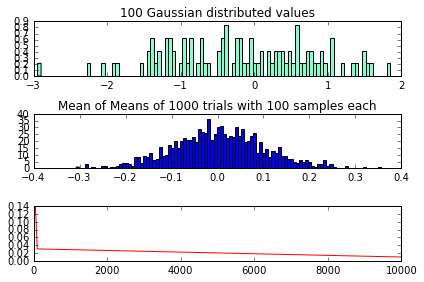

In [90]:
import numpy as np
import scipy as sp      
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
#1
a = np.random.standard_normal(size=100)
mu = 0
sigma = 1
#n, bins, patches = plt.hist(a)
#x = mu + sigma
#2
plt.subplot(3,1,1)
plt.title("100 Gaussian distributed values")
n, bins, patches = plt.hist(a, 100, normed = True, color = 'aquamarine')

#std error = sigma/root(N) std dev/ number of data points
#std error how accurate is the mean 

#3,4,5
print "Mean, Median, Std deviation, and mode for 100 random numbers"
print 'Mean = {0:5.0f}'.format(sp.mean(a))
print 'Median = {0:5.0f}'.format(sp.median(a))
print 'Standard deviation = {0:5.1f}'.format(np.std(a))
print 'Mode = {0:5.0f}'.format(0.5*(bins[np.argmax(n)]+bins[np.argmax(n)+1])), '\n'

#6
#SE = sigma/root(n)
#mean of mins hist sigma = SE
#N = 100
plt.subplot(3,1,2)
plt.title("Mean of Means of 1000 trials with 100 samples each")
meanList1 = []
#a1 = np.random.standard_normal(size=100)
for x in range(0,1000):
    a1 = np.random.standard_normal(size=100)
    meanList1.append(sp.mean(a1))
n, bins, patches = plt.hist(meanList1, 100)
print "Mean of 100 samples with 1000 trials: " , sp.mean(meanList1)
print "Standard deviation of 100 samples with 1000 trials: ", sp.std(meanList1)
print "Standard error of 1 sample: ", sp.std(a)/np.sqrt(100), '\n'



meanList11 = []
for x in range(0,1000):
    a11 = np.random.standard_normal(size=50)
    meanList11.append(sp.mean(a11))
#n, bins, patches = plt.hist(meanList2, 100)
print "Mean of samples with size 10 run through 1000 trials: " , sp.mean(meanList11)
print "Standard deviation of samples size 10 run through 1000 trials: ", sp.std(meanList11)
print "Standard error of 1 sample: ", sp.std(a)/np.sqrt(10), "\n"

meanList2 = []
for x in range(0,1000):
    a2 = np.random.standard_normal(size=50)
    meanList2.append(sp.mean(a2))
#n, bins, patches = plt.hist(meanList2, 100)
print "Mean of samples with size 50 run through 1000 trials: " , sp.mean(meanList2)
print "Standard deviation of samples size 50 run through 1000 trials: ", sp.std(meanList2)
print "Standard error of 1 sample: ", sp.std(a)/np.sqrt(50), "\n"



meanList3 = []
for x in range(0,1000):
    a3 = np.random.standard_normal(size=1000)
    meanList3.append(sp.mean(a3))
print "Mean of 1000 samples with 1000 trials: " , sp.mean(meanList3)
print "Standard deviation of 1000 samples with 1000 trials: ", sp.std(meanList3)
print "Standard error of 1 sample: ", sp.std(a)/np.sqrt(1000), "\n"

meanList4 = []
for x in range(0,1000):
    a4 = np.random.standard_normal(size=10000)
    meanList4.append(sp.mean(a4))
print "Mean of 1000 samples with 1000 trials: " , sp.mean(meanList4)
print "Standard deviation of 1000 samples with 1000 trials: ", sp.std(meanList4)
print "Standard error of 1 sample: ", sp.std(a)/np.sqrt(10000), "\n"



plt.subplot(3,1,3)
rmsArr = np.array([sp.std(meanList11), sp.std(meanList2), sp.std(meanList3), sp.std(meanList4)])
nArr = np.array([10, 50, 100, 10000])
plt.plot(nArr, rmsArr, 'r')
plt.tight_layout()

## Exponential distribution

In this part we will repeat the above process, but now using lists of exponentially distributed random numbers. The probability of selecting a random number between $x$ and $x+dx$ is $\propto e^{-x}dx$. Exponential distributions often appear in lossy systems, e.g. if you plot an amplitude of a damped oscillator as a function of time. Or you may see it when you plot the number of decays of a radioactive isotope as a function of time. 

In [31]:
# generate a single random number, exponentially-distributed with scale=1. 
x = np.random.exponential()
print x

# generate an array of 10 such numbers
a = np.random.exponential(size=10)
print a

0.246594128215
[ 0.31624278  2.59061301  0.84992633  1.81278416  0.75713827  0.27205679
  3.7934781   0.58321493  0.14243387  1.17722209]


### Exercise 3
1. What do you expect to be the mean of the distribution? What do you expect to be the standard deviation?
1. Generate $N=100$ random numbers, exponentially-distributed with scale=1. 
1. Plot them in a histogram. 
1. Compute mean, standard deviation (RMS), and the error on the mean. Is this what you expected?
1. Now find the means, standard deviations, and errors on the means for each of the $M=1000$ experiments of $N=100$ measurements each. Plot a histogram of each quantity. Is the RMS of the distribution of the means consistent with your calculation of the error on the mean for $N=100$ ? 
1. Now repeat question 5 for $N=10,100,1000,10000$. Plot a graph of the RMS of the distribution of the means vs $N$. Is it consistent with your expectations ? This is a demonstration of the *Central Limit Theorem*


Mean =     1
Median =     1
Standard deviation =   0.8
Mode =     0 

Mean of 100 samples with 1000 trials:  1.00019421609
Standard deviation of 100 samples with 1000 trials:  0.0985119898098
Standard error of 1 sample:  0.0840910025542 

Mean of 10 samples with 1000 trials:  1.01213602819
Standard deviation of 10 samples with 1000 trials:  0.312603415957
Standard error of 1 sample:  0.265919098798 

Mean of 10 samples with 1000 trials:  1.0012516285
Standard deviation of 10 samples with 1000 trials:  0.0307835178403
Standard error of 1 sample:  0.0265919098798 

Mean of 10 samples with 1000 trials:  1.00025660153
Standard deviation of 10 samples with 1000 trials:  0.0101537692968
Standard error of 1 sample:  0.00840910025542 



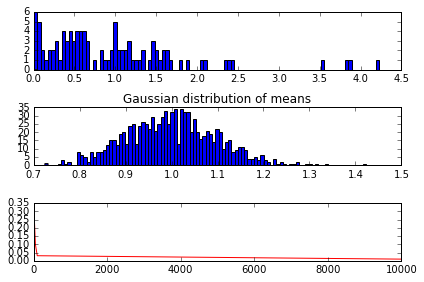

In [121]:
import numpy as np
import scipy as sp      
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

#sigma ^2 = 1/M sum (xi-m)^2
#variance = sigma^2
#M is number of data points in each experiments 

#123
plt.subplot(3,1,1)
a = np.random.exponential(size=100)
n, bins, patches = plt.hist(a, 100)

print 'Mean = {0:5.0f}'.format(sp.mean(a))
print 'Median = {0:5.0f}'.format(sp.median(a))
print 'Standard deviation = {0:5.1f}'.format(np.std(a))
print 'Mode = {0:5.0f}'.format(0.5*(bins[np.argmax(n)]+bins[np.argmax(n)+1])), '\n'


#4
plt.subplot(3,1,2)
plt.title("Gaussian distribution of means")
meanList1 = []
#a1 = np.random.standard_normal(size=100)
for x in range(0,1000):
    a1 = np.random.exponential(size=100)
    meanList1.append(sp.mean(a1))
n, bins, patches = plt.hist(meanList1, 100)
print "Mean of 100 samples with 1000 trials: " , sp.mean(meanList1)
print "Standard deviation of 100 samples with 1000 trials: ", sp.std(meanList1)
print "Standard error of 1 sample: ", sp.std(a)/np.sqrt(100), '\n'


meanList2 = []
for x in range(0,1000):
    a2 = np.random.exponential(size=10)
    meanList2.append(sp.mean(a2))
#n, bins, patches = plt.hist(meanList2, 100)
print "Mean of 10 samples with 1000 trials: " , sp.mean(meanList2)
print "Standard deviation of 10 samples with 1000 trials: ", sp.std(meanList2)
print "Standard error of 1 sample: ", sp.std(a)/np.sqrt(10), '\n'

meanList3 = []
for x in range(0,1000):
    a3 = np.random.exponential(size=1000)
    meanList3.append(sp.mean(a3))
#n, bins, patches = plt.hist(meanList2, 100)
print "Mean of 10 samples with 1000 trials: " , sp.mean(meanList3)
print "Standard deviation of 10 samples with 1000 trials: ", sp.std(meanList3)
print "Standard error of 1 sample: ", sp.std(a)/np.sqrt(1000), '\n'

meanList4 = []
for x in range(0,1000):
    a4 = np.random.exponential(size=10000)
    meanList4.append(sp.mean(a4))
#n, bins, patches = plt.hist(meanList2, 100)
print "Mean of 10 samples with 1000 trials: " , sp.mean(meanList4)
print "Standard deviation of 10 samples with 1000 trials: ", sp.std(meanList4)
print "Standard error of 1 sample: ", sp.std(a)/np.sqrt(10000), '\n'


plt.subplot(3,1,3)
rmsArr = np.array([sp.std(meanList2), sp.std(meanList1), sp.std(meanList3), sp.std(meanList4)])
nArr = np.array([10, 50, 100, 10000])
plt.plot(nArr, rmsArr, 'r')

plt.tight_layout()

### Binomial distribution
The binomial distribution with parameters $n$ and $p$ is the *discrete* probability distribution of the number of successes in a sequence of $n$ independent yes/no experiments, each of which yields success with probability $p$. A typical example is a distribution of the number of *heads* for $n$ coin flips ($p=0.5$) 

In [14]:
p = 0.5
# flip one coin. 0 = heads, 1 = tails
print np.random.binomial(1,p)

0


### Exercise 4
1. Generate $N=10$ random coin flips. 
1. Plot the outcomes in a histogram (0=heads, 1=tails). 
1. Compute mean, standard deviation (RMS), and the error on the mean. Is this what you expected?


Mean of sample: 0.4
Standard deviation of sample: 0.489897948557
Standard Error: 0.154919333848


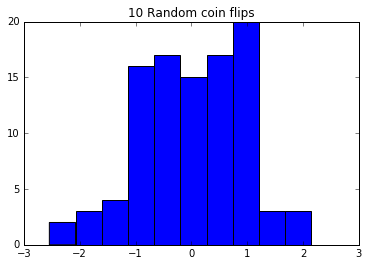

In [78]:
import numpy as np
import scipy as sp      
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

p = .5
rand = []
for x in range(0,10):
    rand.append(np.random.binomial(1,p))

plt.title("10 Random coin flips")
n, bins, patches = plt.hist(a, 10)
print "Mean of sample:", sp.mean(rand)
print "Standard deviation of sample:", sp.std(rand)
print "Standard Error:", sp.std(rand)/np.sqrt(10)

### Poisson distribution
The Poisson distribution is a *discrete* probability distribution that expresses the probability of a given number of events $n$ occurring in a fixed interval of time $T$ if these events occur with a known average rate $\nu/T$ and independently of the time since the last event. The *expectation value* of $n$ is $\nu$. The variance of $n$ is also $\nu$, so the standard deviation of $n$ is $\sigma(n) = \sqrt{\nu}$

In [17]:
nu = 10 # expected number of events
n = np.random.poisson(nu)  # generate a Poisson-distributed number
print n
#expectation value is mean

11


### Exercise 5
1. Generate $N=100$ random numbers, Poisson-distributed with $\nu=10$. 
1. Plot them in a histogram. 
1. Compute mean, standard deviation (RMS), and the error on the mean. Is this what you expected?
1. Now repeat question 3 for $\nu=1,5,100,10000$. Plot a graph of the RMS vs $\nu$. Is it consistent with your expectations ? 


Values for v = 10
Mean =     9
Standard deviation =   3.1
Standard Error: 0.987415819197 

Values for v = 1
Mean =     1
Standard deviation =   1.0
Standard Error: 3.12248298634 

Values for v = 5
Mean =     5
Standard deviation =   2.4
Standard Error: 1.39641684321 

Values for v = 100
Mean =   100
Standard deviation =   9.4
Standard Error: 0.312248298634 



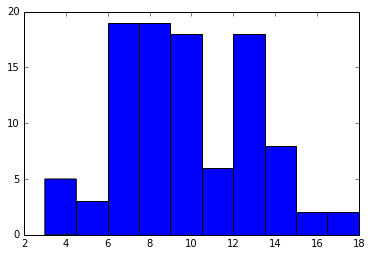

In [138]:
import numpy as np
import scipy as sp      
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

pois = []
for x in range(0,100):
    a = np.random.poisson(10)
    pois.append(sp.mean(a))

n, bins, patches = plt.hist(pois, 10)

print 'Values for v = 10'
print 'Mean = {0:5.0f}'.format(sp.mean(pois))
print 'Standard deviation = {0:5.1f}'.format(np.std(pois))
print "Standard Error:", sp.std(pois)/np.sqrt(10), '\n'

pois1 = []
for x in range(0,100):
    # a1 = np.random.poisson(1)
    # pois1.append(sp.mean(a1))
    pois1.append(np.random.poisson(1))
print 'Values for v = 1'
print 'Mean = {0:5.0f}'.format(sp.mean(pois1))
print 'Standard deviation = {0:5.1f}'.format(np.std(pois1))
print "Standard Error:", sp.std(pois)/np.sqrt(1), '\n'


pois2 = []
for x in range(0,100):
    a2 = np.random.poisson(5)
    pois2.append(sp.mean(a2))
    #pois2.append(np.random.poisson(5))
print 'Values for v = 5'
print 'Mean = {0:5.0f}'.format(sp.mean(pois2))
print 'Standard deviation = {0:5.1f}'.format(np.std(pois2))
print "Standard Error:", sp.std(pois)/np.sqrt(5), '\n'
    
pois3 = []
for x in range(0,100):
    #pois3.append(np.random.poisson(100))
    a3 = np.random.poisson(100)
    pois3.append(sp.mean(a3))

print 'Values for v = 100'
print 'Mean = {0:5.0f}'.format(sp.mean(pois3))
print 'Standard deviation = {0:5.1f}'.format(np.std(pois3))
print "Standard Error:", sp.std(pois)/np.sqrt(100), '\n'


## 2d distributions

You can create two independent samples of events and plot their distribution as a *scatter* plot:

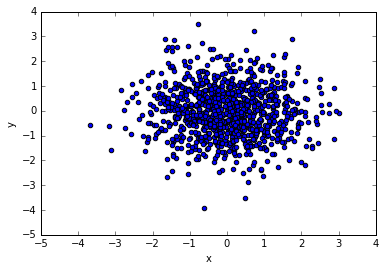

In [36]:
x = np.random.standard_normal(size=1000)
y = np.random.standard_normal(size=1000)
plt.scatter(x,y)
plt.xlabel('x')
plt.ylabel('y')

You can compute the correlation matrix for two variables:

In [43]:
print sp.corrcoef(x,y)

[[ 1.         -0.04235591]
 [-0.04235591  1.        ]]


Although more instructive perhaps is to print the full covariance matrix:

In [44]:
print sp.cov(x,y)

[[ 1.10298319 -0.04513418]
 [-0.04513418  1.02947129]]


Here is a cute example of plotting projection histograms together with the scatter plot:
(from http://matplotlib.org/examples/pylab_examples/scatter_hist.html )

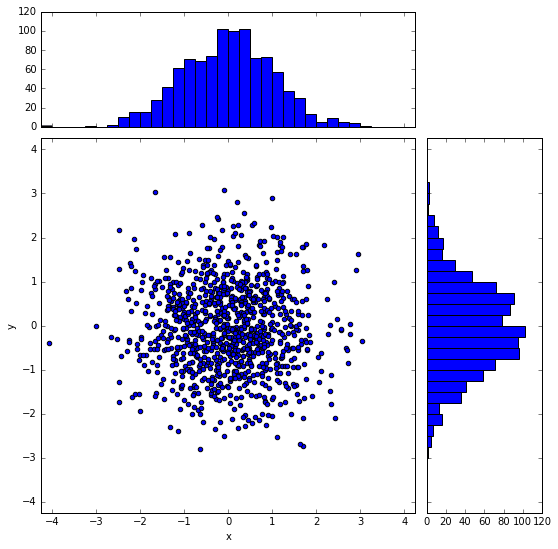

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter

# the random data
x = np.random.randn(1000)
y = np.random.randn(1000)

nullfmt = NullFormatter()         # no labels

# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left + width + 0.02

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom_h, width, 0.2]
rect_histy = [left_h, bottom, 0.2, height]

# start with a rectangular Figure
plt.figure(1, figsize=(8, 8))

axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)

# no labels
axHistx.xaxis.set_major_formatter(nullfmt)
axHisty.yaxis.set_major_formatter(nullfmt)

# the scatter plot:
axScatter.scatter(x, y)

# now determine nice limits by hand:
binwidth = 0.25
xymax = np.max([np.max(np.fabs(x)), np.max(np.fabs(y))])
lim = (int(xymax/binwidth) + 1) * binwidth

axScatter.set_xlim((-lim, lim))
axScatter.set_ylim((-lim, lim))

bins = np.arange(-lim, lim + binwidth, binwidth)
axHistx.hist(x, bins=bins)
axHisty.hist(y, bins=bins, orientation='horizontal')

axHistx.set_xlim(axScatter.get_xlim())
axHisty.set_ylim(axScatter.get_ylim())

axScatter.set_xlabel('x')
axScatter.set_ylabel('y')

plt.show()

You can also create a correlated sample:

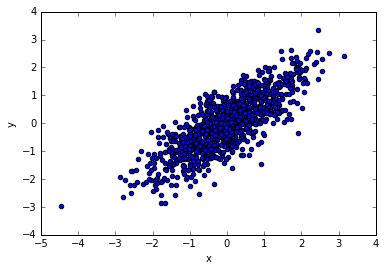

In [54]:
 # mean values of two variables
mean = [0, 0] 

#  covariance matrix 
# Note that the covariance matrix must be positive semidefinite (a.k.a. nonnegative-definite). 
# Otherwise, the behavior of this method is undefined and backwards compatibility is not guaranteed.
cov = [[1, 0.8], [0.8, 1]]  

# produce a sample 
x, y = np.random.multivariate_normal(mean, cov, 1000).T   

# plot -- this looks like a streak
plt.scatter(x,y)
plt.xlabel('x')
plt.ylabel('y')

### Exercise 6
Produce a *profile* plot from the previous sample, i.e. subdivide $x$ range into bins (e.g. 60 bins from $x\in [-3..3]$), for each bin in $x$ compute the mean of $y$ distribution, then plot mean of $y$ and its error vs $x$. 


[[ 0.60150833  0.26397483]
 [ 1.44768202  0.91186118]
 [-0.9248041  -0.53681518]
 ..., 
 [ 0.65316917  0.83394823]
 [ 0.00336448  0.4274205 ]
 [-0.08998052 -0.43456828]]
-0.126046260394


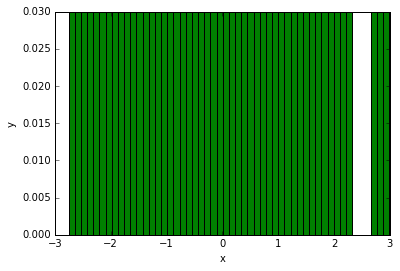

In [263]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp      
from scipy import stats
%matplotlib inline


mean = [0, 0] 
cov = [[1, 0.8], [0.8, 1]]  
x, y = np.random.multivariate_normal(mean, cov, 1000).T   

xy_original = np.stack((x, y), axis = -1)
print xy_original

y1 = sorted(y, key = int)
x1 = sorted(x, key = int)

#define bins
values = np.array([x])
bins = 60

#b = np.digitize(values,b)
print b

binslist=[]
bins = []
binincrement = -3


for x in range(0, 60):
    binslist.append(bins)


step = (x1[len(x1)-1] - x1[0] / 60)
ymean = []
errorx = []
#for r in np.arange(0, len(x)-1, step):
    
    

plt.axis([-3, 3, 0, 0.03])
n, bins, patches = plt.hist(y1 , 60, facecolor = 'g')
#plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')

plt.show()



## Fitting

Examples of how to do a fit to a graph were given in lecture (see Lecture05.ipynb). Let's practice with the fits a bit more. 

The simplest technique to describe is least-squares fitting (see lecture notes). Usually you use the least-squares fit if you have a graph (i.e. a set of data points $y_i(x_i)$), you want to describe it in terms of a model $y(x;\theta)$, where parameters $\theta$ are unknown. You fit to determine the values of $\theta$ and (hopefully) their uncertainties.  

There are two standard cases where least-squares method is applicable:
1. You know errors for each data point $\sigma_i$ and you know that those errors are Gaussian. In this case, you minimize $\chi^2=\sum \left(\frac{y_i - y(x_i;\theta)}{\sigma_i}\right)^2$. The value of the $\chi^2_{\min}$ can be interpreted as a goodness-of-fit, and the errors on parameters $\theta$ have probabilistic interpretation
1. You know that the errors are Gaussian and are the same for each data point, but you do not know their magnitude. In this case, you would minimize the sum of squares: $\mathcal{S} = \sum \left(y_i - y(x_i;\theta)\right)^2$. Then value of $\mathcal{S}$ can be used to compute the errors $\sigma_i$ for each data point: $\sigma_i = \sqrt{\mathcal{S}/(N_\mathrm{data}-N_\mathrm{parameters})}$
The errors on $\theta$ have a probabilistic definition, but you lose information about the goodness of fit
1. If the errors are not known to be Gaussian, then the least square method is not useful to estimate uncertainties or the goodness of fit. It is also not guaranteed to be unbiased or most efficient. 

### Polynomial $\chi^2$ fit


a= 0.057+/-0.118
b= 0.993+/-0.022
chi^2 =  8.81
chi^2/d.f.= 1.10


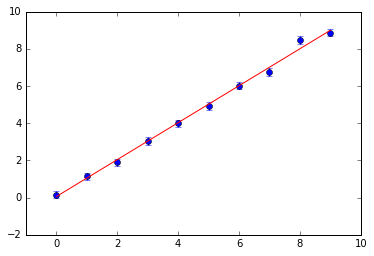

In [104]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as fitter


# Generate artificial data = straight line with a=0 and b=1
# plus some noise.
a0 = 0
b0 = 1
sig = 0.2
Npoints = 10

xdata = np.arange(0,Npoints,1.)
ydata = a0+xdata*b0+sig*np.random.standard_normal(size=Npoints)
sigma = np.ones(Npoints)*sig

# define a fit model. For this part, we will use a linear function
def model(x, a, b):
    return a + b*x

# You have to supply an initial guess of parameters, and they should be "close enough" to the true values, otherwise
# the fit may fall into a false minimum
par0    = np.array([0.0, 1.0])
par, cov = fitter.curve_fit(model, xdata, ydata, par0, sigma, absolute_sigma=True)

# par arrays contains the values of parameters. cov is the covariance matrix
# decode it now
a = par[0]
ea = np.sqrt(cov[0,0])
print 'a={0:6.3f}+/-{1:5.3f}'.format(a,ea)
b = par[1]
eb = np.sqrt(cov[1,1])
print 'b={0:6.3f}+/-{1:5.3f}'.format(b,eb)

# compute reduced chi2
chi_squared = np.sum(((model(xdata, *par)-ydata)/sigma)**2)
reduced_chi_squared = (chi_squared)/(len(xdata)-len(par))
print 'chi^2 = {0:5.2f}'.format(chi_squared)
print 'chi^2/d.f.={0:5.2f}'.format(reduced_chi_squared)

# overlay plot over data
plt.errorbar(xdata, ydata, xerr=0, yerr=sigma, fmt='o')
plt.xlim(-1,Npoints)
xfit = np.linspace(0,Npoints-1.,50)
plt.plot(xfit,model(xfit,par[0],par[1]),'r-')
plt.show()

You can also do an *unweighted* fit if you do not know the uncertainties for each point. *curve_fit* will minimize 
$\mathcal{S} = \sum \left(y_i - y(x_i;\theta)\right)^2$. You can use it to estimate the uncertainty for each point: 
$\sigma_i = \sqrt{\mathcal{S}/(N_\mathrm{data}-N_\mathrm{parameters})}$.

a= 0.057+/-0.123
b= 0.993+/-0.023
Generated error =  0.20
Computed error =  0.21


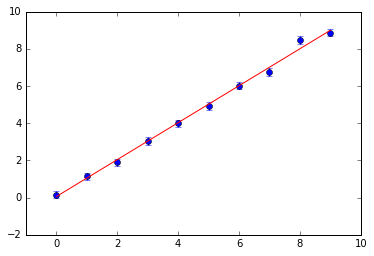

In [105]:
# You have to supply an initial guess of parameters, and they should be "close enough" to the true values, otherwise
# the fit may fall into a false minimum
par0    = np.array([0.0, 1.0])
par, cov = fitter.curve_fit(model, xdata, ydata, par0, sigma, absolute_sigma=False)

# par arrays contains the values of parameters. cov is the covariance matrix
# decode it now
a = par[0]
ea = np.sqrt(cov[0,0])
print 'a={0:6.3f}+/-{1:5.3f}'.format(a,ea)
b = par[1]
eb = np.sqrt(cov[1,1])
print 'b={0:6.3f}+/-{1:5.3f}'.format(b,eb)

# compute the error per point
sigCalc = np.sqrt(np.sum(((model(xdata, *par)-ydata))**2)/(len(xdata)-len(par)))
print 'Generated error = {0:5.2f}'.format(sig)
print 'Computed error = {0:5.2f}'.format(sigCalc)

# overlay plot over data
plt.errorbar(xdata, ydata, xerr=0, yerr=sigma, fmt='o')
plt.xlim(-1,Npoints)
xfit = np.linspace(0,Npoints-1.,50)
plt.plot(xfit,model(xfit,par[0],par[1]),'r-')
plt.show()

### Fitting to a distribution

scipy.stats package provides parameterizations of many standard probability density functions (PDFs). Each PDF has a *fit()* method, which does an *unbinned maximum likelihood fit* to a set of events, constraining the parameters of the PDF. Here is an example of a fit of a set of events to a Gaussian PDF.
Courtesy http://glowingpython.blogspot.com/2012/07/distribution-fitting-with-scipy.html

mean=-0.05
sigma=1.00


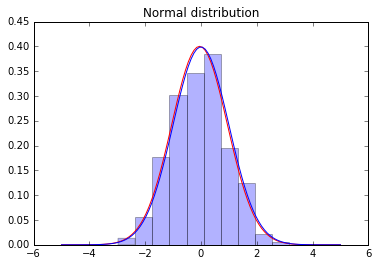

In [109]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

# generate 1000 events from a normal distrubution
# with mean 0 and standard deviation 1
sample = norm.rvs(loc=0,scale=1,size=1000) 

par = norm.fit(sample) # fit this sample to a gaussian distribution, determine parameters

print 'mean={0:4.2f}'.format(par[0])
print 'sigma={0:4.2f}'.format(par[1])

# now, par[0] and par[1] are the mean and 
# the standard deviation of the fitted distribution
x = np.linspace(-5,5,100)
# fitted distribution
pdf_fitted = norm.pdf(x,loc=par[0],scale=par[1])
# original distribution
pdf = norm.pdf(x)

plt.title('Normal distribution')
plt.plot(x,pdf_fitted,'r-',x,pdf,'b-')
plt.hist(sample,normed=1,alpha=.3)
plt.show()

Unfortunately, *scipy.stats.fit* does not provide an esitimate of the covariance matrix (or even the errors on the parameters). This is a major problem with doing max-likelihood fits using *scipy.stats* package ! (any respectable physicist needs to report errors for his/her measurements !). There are more advanced tools for likelihood fitting that do provide error estimates -- but at this point they are beyond the scope of this class. But here are a few pointers:

- PyROOT: https://root.cern.ch/pyroot
- KaFE: http://www-ekp.physik.uni-karlsruhe.de/~quast/kafe/html/

For a Gaussian distribution, and a few others, max-likelihood estimators have analytic formulae:

$\hat{\mu} = \frac{1}{N}\sum_{i=1}^N x_i$

$\hat{\sigma^2} = \frac{1}{N}\sum_{i=1}^N (x_i-\hat{\mu})^2$

$\sigma(\hat{\mu}) = \frac{\

In [136]:
N=len(sample)
mean = np.mean(sample)
sigma = np.sqrt(np.sum((sample-mean)**2)/N)
eMean = sigma/np.sqrt(N)
eSigma=np.sqrt((np.sum((sample-mean)**4)/N-(N-3)/(N-1)*sigma**4)/N)
print 'Max-likelihood estimate of mean={0:4.2f}+/-{1:4.2f}'.format(mean,eMean)
print 'Max-likelihood estimate of sigma={0:4.2f}+/-{1:4.2f}'.format(sigma,eSigma)


Max-likelihood estimate of mean=-0.05+/-0.03
Max-likelihood estimate of sigma=1.00+/-0.05


A more common way to determine parameters of a distribition is to do perform a *binned least-squares fit*, i.e. fit a distribution to a histogram. When doing so, it is important to assign proper Poisson errors to each bin of a histogram. Here is how you can create a histogram with Poisson errors:

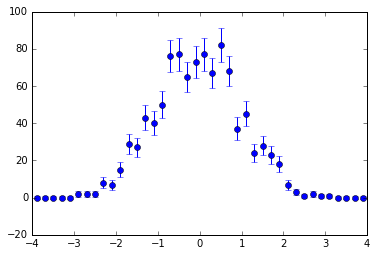

In [135]:
y, bin_edges = np.histogram(sample, range=(-4,4),bins=40)
x = 0.5*(bin_edges[1:] + bin_edges[:-1])
ey = np.sqrt(y)
# have to be careful to make sure errors are never zero, or chi2 fit would fail ! Assign minimum error of 1 to all bins
ey = [max(error,1) for error in ey]

plt.errorbar(x,y,ey, fmt='o')
plt.show()


### Exercise 7

Fit this histogram to a Gaussian function using a chi2 fit, print mean and sigma parameters and their uncertainties. *Hint*: use *scipy.optimize.curve_fit* example above

0
a=78.469+/-2.221
b=-0.126+/-0.033
Mean =  -0.0238838976078
Sigma =  1.01396764812
Max-likelihood estimate of mean=-0.02+/-0.03
Max-likelihood estimate of sigma=1.00+/-0.06


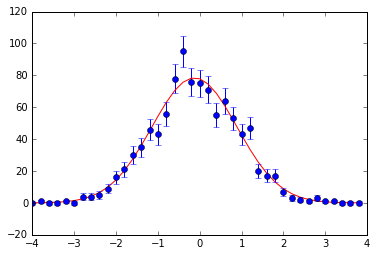

In [209]:
import numpy as np
import scipy as sp
from scipy.stats import norm, chi2
import matplotlib.pyplot as plt
import scipy.optimize as fitter
%matplotlib inline


#x data is bin_edges y data is y
y, bin_edges = np.histogram(sample, range=(-4,4),bins=40)
x = [0.5*(bin_edges[1:] + bin_edges[:-1])]
x1 = bin_edges[0:len(bin_edges)-1]


ey = np.sqrt(y)
# have to be careful to make sure errors are never zero, or chi2 fit would fail ! Assign minimum error of 1 to all bins
ey = [max(error,1) for error in ey]

def model(x, a, mu, sigma):
    return a*np.exp(-((x-mu)**2)/(2*sigma**2))


par0 = np.array([1.0, 1.0, .1])
par, cov = fitter.curve_fit(model, x1, y, par0)

yfit = par[0] * np.exp(-((x1-par[1])**2)/(2*par[2]**2))
plt.plot(x1, yfit, 'r')

a = par[0]
ea = np.sqrt(cov[0,0])
print 'a={0:6.3f}+/-{1:5.3f}'.format(a,ea)
b = par[1]
eb = np.sqrt(cov[1,1])
print 'b={0:6.3f}+/-{1:5.3f}'.format(b,eb)

N = len(sample)
mean = sp.mean(sample)
print 'Mean = ',  mean
sigma = sp.sqrt(np.sum((sample-mean)**2)/len(sample))
print 'Sigma = ', sigma

eMean = sigma/np.sqrt(N)
eSigma=np.sqrt((np.sum((sample-mean)**4)/N-(N-3)/(N-1)*sigma**4)/N)
print 'Max-likelihood estimate of mean={0:4.2f}+/-{1:4.2f}'.format(mean,eMean)
print 'Max-likelihood estimate of sigma={0:4.2f}+/-{1:4.2f}'.format(sigma,eSigma)

#chi_squared = np.sum(((model(x1, *par)-y)/sigma)**2)
#reduced_chi_squared = (chi_squared)/(len(x1)-len(par))
#print 'chi^2 = {0:5.2f}'.format(chi_squared)
#print 'chi^2/d.f.={0:5.2f}'.format(reduced_chi_squared)


plt.errorbar(x1,y,ey, fmt='o')
plt.show()
